# Perceptron
## Research Question: "Predict whether a stop and search will conclude in police action".

#### In this notebook we attempt to answer the research question using the data set (https://www.kaggle.com/sohier/london-police-records?select=london-stop-and-search.csv). Specifically, we will attempt to answer it by using Perceptron to classify the data points on the target ("Outcome" of the stop and search).

In [274]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
import util
import util_smote as usm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

import imblearn
from imblearn.over_sampling import SMOTE

In [231]:
def evaluate(model, X_train, y_train, X_test, y_test, average='weighted'):
    print(f"Accurancy Score (Train): {int(np.around(model.score(X_train, y_train), 2) * 100)}%")
    print(f"Accuracy Score (Test): {int(np.around(model.score(X_test, y_test), 2) * 100)}%")
    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)
    print(f"\nPrecision Score (Train): {int(np.around(precision_score(y_train, y_train_predictions, average=average), 2) * 100)}%")
    print(f"Precision Score (Test): {int(np.around(precision_score(y_test, y_test_predictions, average=average), 2) * 100)}%")
    print(f"\nRecall Score (Train): {int(np.around(recall_score(y_train, y_train_predictions, average=average), 2) * 100)}%")
    print(f"Recall Score (Test): {int(np.around(recall_score(y_test, y_test_predictions, average=average), 2) * 100)}%")
    print(f"\nF1 Score (Train): {int(np.around(f1_score(y_train, y_train_predictions, average=average), 2) * 100)}%")
    print(f"F1 Score (Test): {int(np.around(f1_score(y_test, y_test_predictions, average=average), 2) * 100)}%")
    print("\n Confusion Matrix")
    util.confusion_plot(y_test=y_test, y_predictions=y_test_predictions)

## Cleaning the Data set

In [232]:
data = pd.read_csv("data.csv", low_memory = False)

# data = data.dropna()
data = util.data_cleaner(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165651 entries, 0 to 302621
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   Type                       165651 non-null  object             
 1   Date                       165651 non-null  datetime64[ns, UTC]
 2   Latitude                   165651 non-null  float64            
 3   Longitude                  165651 non-null  float64            
 4   Gender                     165651 non-null  object             
 5   Age range                  165651 non-null  object             
 6   Officer-defined ethnicity  165651 non-null  object             
 7   Legislation                165651 non-null  object             
 8   Object of search           165651 non-null  object             
 9   Outcome                    165651 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory 

## Encoding Values

In [233]:
data_encoded, encoders = util.data_encoder(data)
data_encoded.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,6
1,1,0,51.512286,-0.114491,1,1,0,4,8,6
2,1,1,51.512286,-0.114491,1,1,4,4,8,6
4,0,2,51.512286,-0.114491,1,1,4,4,8,6
5,1,3,51.512286,-0.114491,1,1,0,3,3,2


## Split data into train and test

In [234]:
# Split into features and target
target = data_encoded["Outcome"]
features = data_encoded.drop('Outcome', axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

## Train the Perceptron

In [235]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=40)

Accurancy Score (Train): 18%
Accuracy Score (Test): 18%

Precision Score (Train): 45%
Precision Score (Test): 44%

Recall Score (Train): 18%
Recall Score (Test): 18%

F1 Score (Train): 17%
F1 Score (Test): 17%

 Confusion Matrix


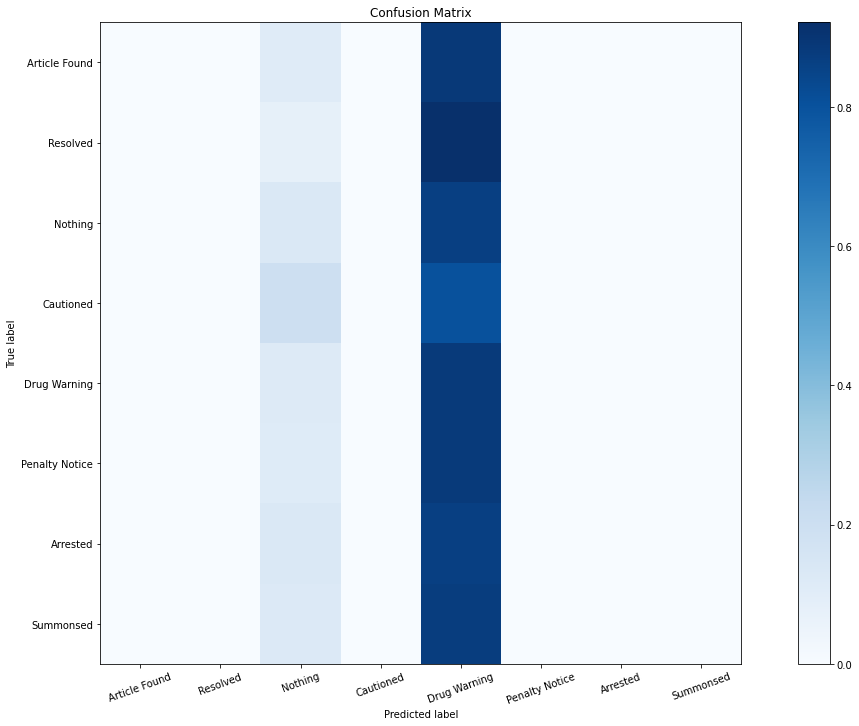

In [236]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

Very low precision score, perhaps increasing the number of iterations will improve the precision of the model.

In [237]:
ppn = Perceptron(max_iter=500,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=500)

Accurancy Score (Train): 18%
Accuracy Score (Test): 18%

Precision Score (Train): 45%
Precision Score (Test): 44%

Recall Score (Train): 18%
Recall Score (Test): 18%

F1 Score (Train): 17%
F1 Score (Test): 17%

 Confusion Matrix


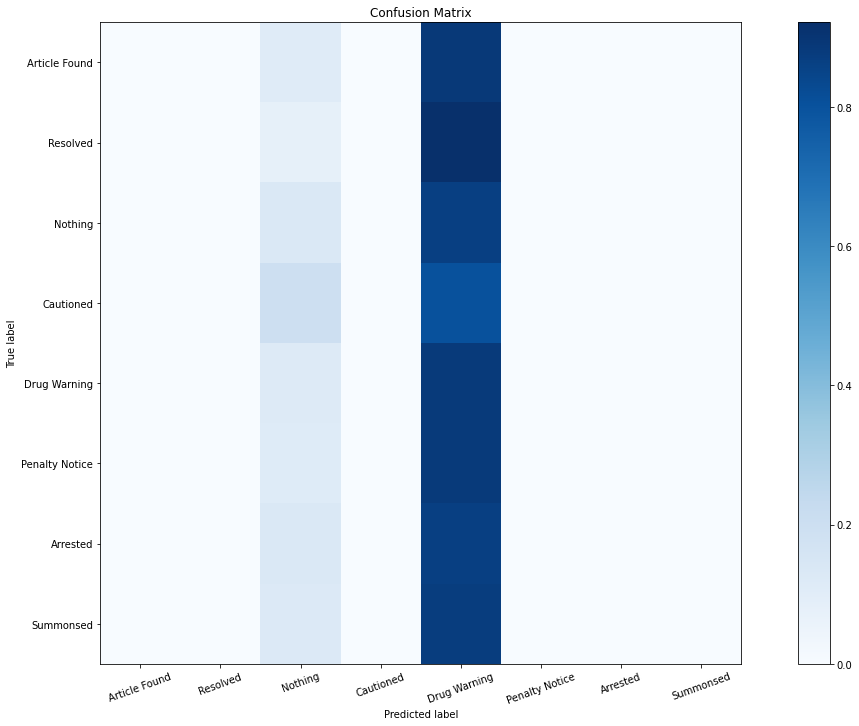

In [238]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

In [239]:
ppn = Perceptron(max_iter=10000,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=10000)

Accurancy Score (Train): 18%
Accuracy Score (Test): 18%

Precision Score (Train): 45%
Precision Score (Test): 44%

Recall Score (Train): 18%
Recall Score (Test): 18%

F1 Score (Train): 17%
F1 Score (Test): 17%

 Confusion Matrix


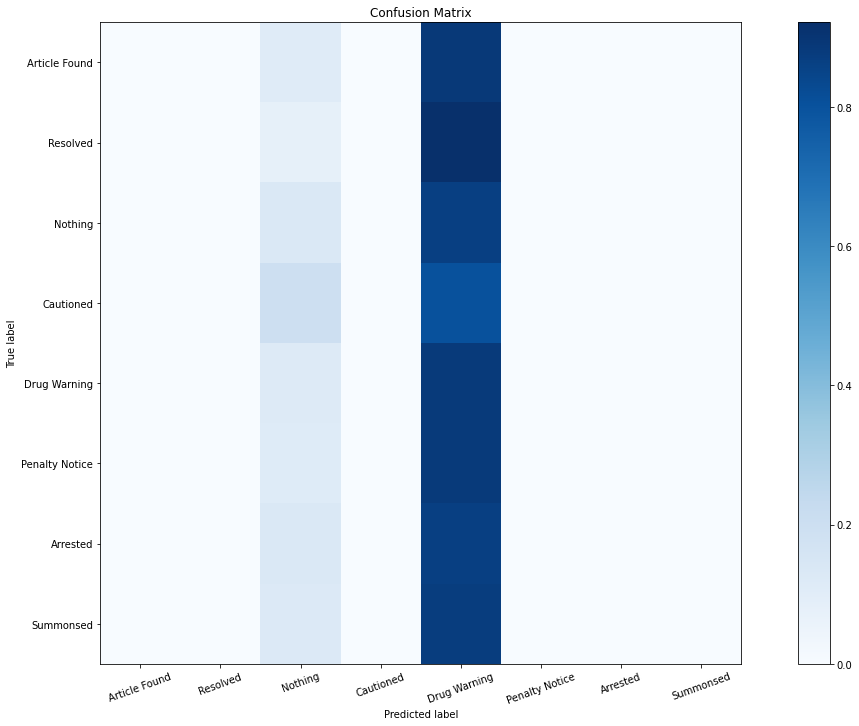

In [240]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

Increasing the number of iterations has no effect on the accuracy score produced, instead I shall tune the learning rate by making it much smaller, as the large learning rate may have caused unstable training.

In [241]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=0.0000001)
ppn.fit(X_train, y_train)

Perceptron(eta0=1e-07, max_iter=40)

Accurancy Score (Train): 18%
Accuracy Score (Test): 18%

Precision Score (Train): 45%
Precision Score (Test): 44%

Recall Score (Train): 18%
Recall Score (Test): 18%

F1 Score (Train): 17%
F1 Score (Test): 17%

 Confusion Matrix


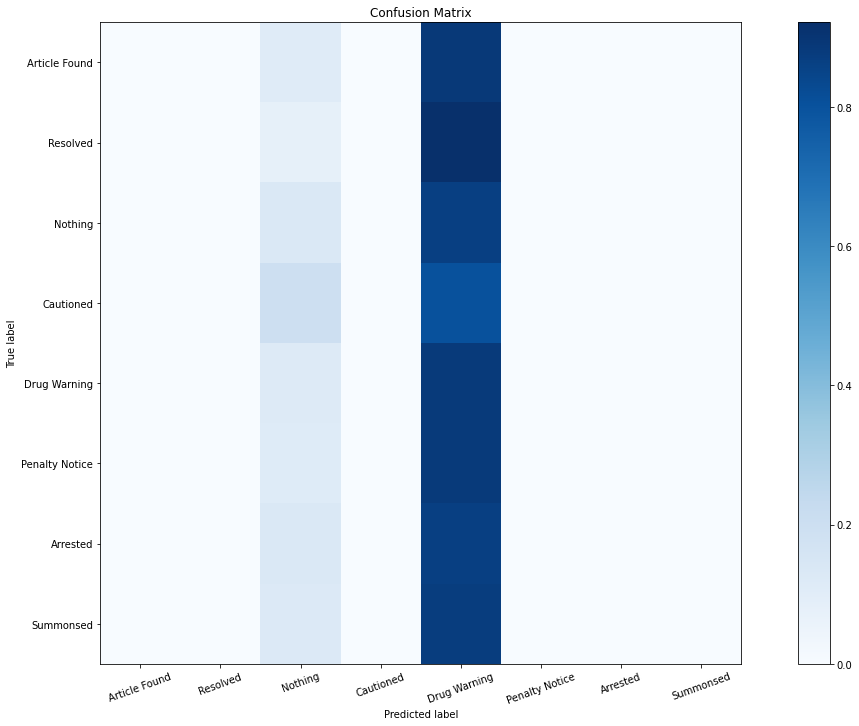

In [242]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

It is clear that tuning the hyperparameters does not have effect on the evaluation scores. After fetching the X and Y variables, we will perform preprocessing.

## Split the features in the range 0 - 1

In [243]:
#Min-Max scaling to bring all the features in the range 0 — 1
#https://hackernoon.com/implementing-the-perceptron-algorithm-from-scratch-in-python-48be2d07b1c0

from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data_encoded.drop('Outcome', axis=1)
Y = data_encoded["Outcome"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("Outcome",axis = 1).columns)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [244]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=40)

Accurancy Score (Train): 22%
Accuracy Score (Test): 22%

Precision Score (Train): 48%
Precision Score (Test): 47%

Recall Score (Train): 22%
Recall Score (Test): 22%

F1 Score (Train): 27%
F1 Score (Test): 27%

 Confusion Matrix


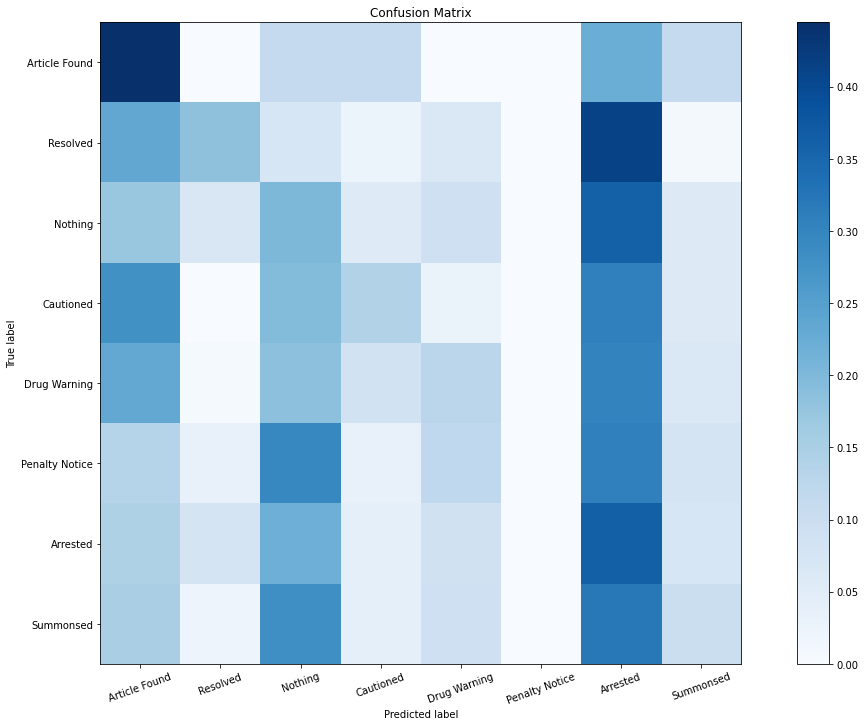

In [245]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

Preprocessing has made the precision score much higher and appears to have made the model much less bias towards predicting Drug Warning, however it is now biased towards predicting Penalty Notice. I will again tune the hyperpramaters in order to try optimise the precision.

In [259]:
ppn = Perceptron(max_iter=10000,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=10000)

Accurancy Score (Train): 22%
Accuracy Score (Test): 22%

Precision Score (Train): 48%
Precision Score (Test): 47%

Recall Score (Train): 22%
Recall Score (Test): 22%

F1 Score (Train): 27%
F1 Score (Test): 27%

 Confusion Matrix


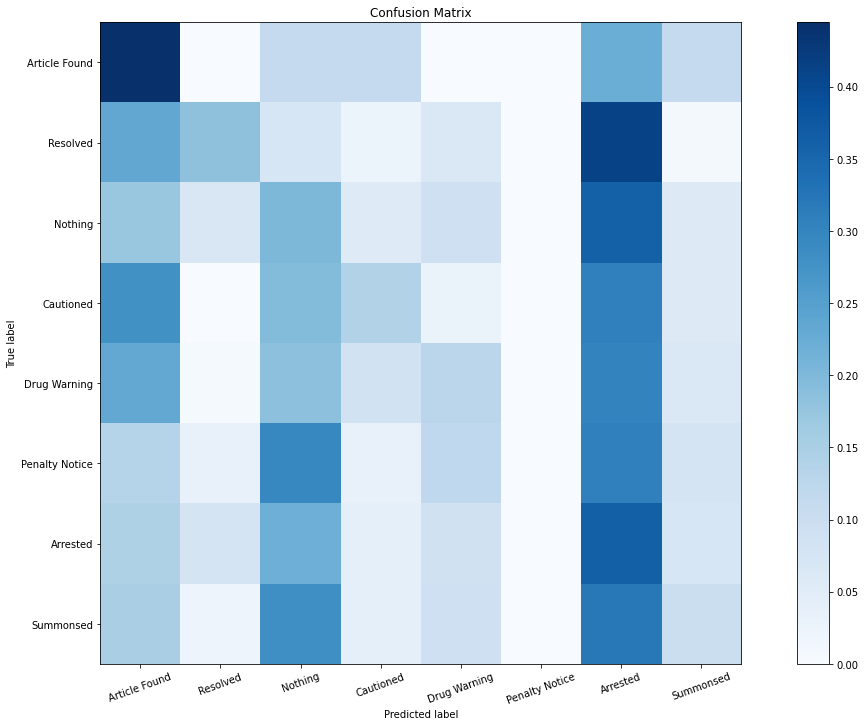

In [260]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

In [261]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=0.00001)
ppn.fit(X_train, y_train)

Perceptron(eta0=1e-05, max_iter=40)

Accurancy Score (Train): 22%
Accuracy Score (Test): 22%

Precision Score (Train): 48%
Precision Score (Test): 47%

Recall Score (Train): 22%
Recall Score (Test): 22%

F1 Score (Train): 27%
F1 Score (Test): 27%

 Confusion Matrix


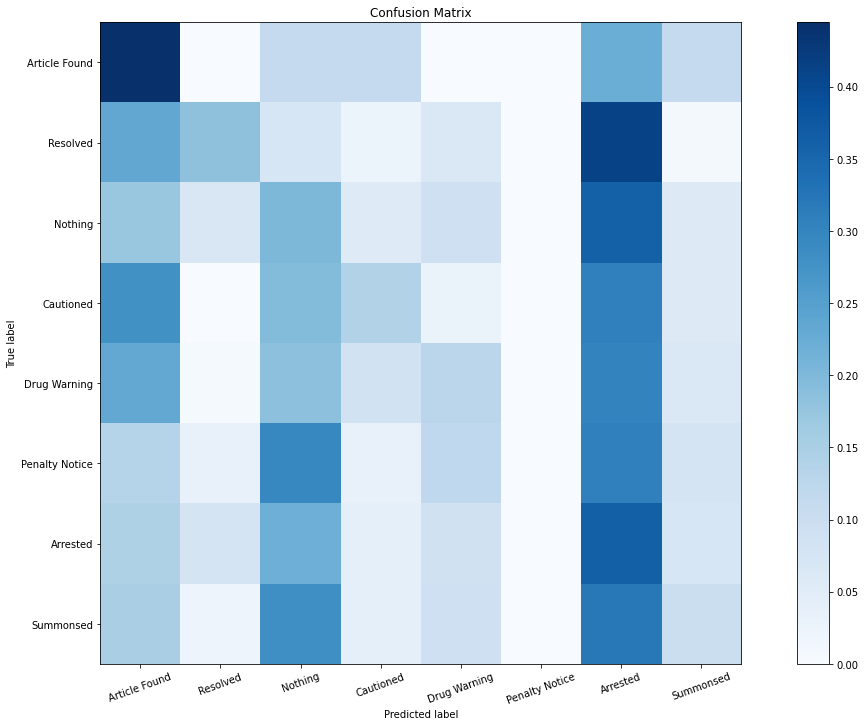

In [262]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

In [263]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1, class_weight="balanced")
ppn.fit(X_train, y_train)

Perceptron(class_weight='balanced', eta0=1, max_iter=40)

Accurancy Score (Train): 2%
Accuracy Score (Test): 2%

Precision Score (Train): 40%
Precision Score (Test): 40%

Recall Score (Train): 2%
Recall Score (Test): 2%

F1 Score (Train): 0%
F1 Score (Test): 0%

 Confusion Matrix


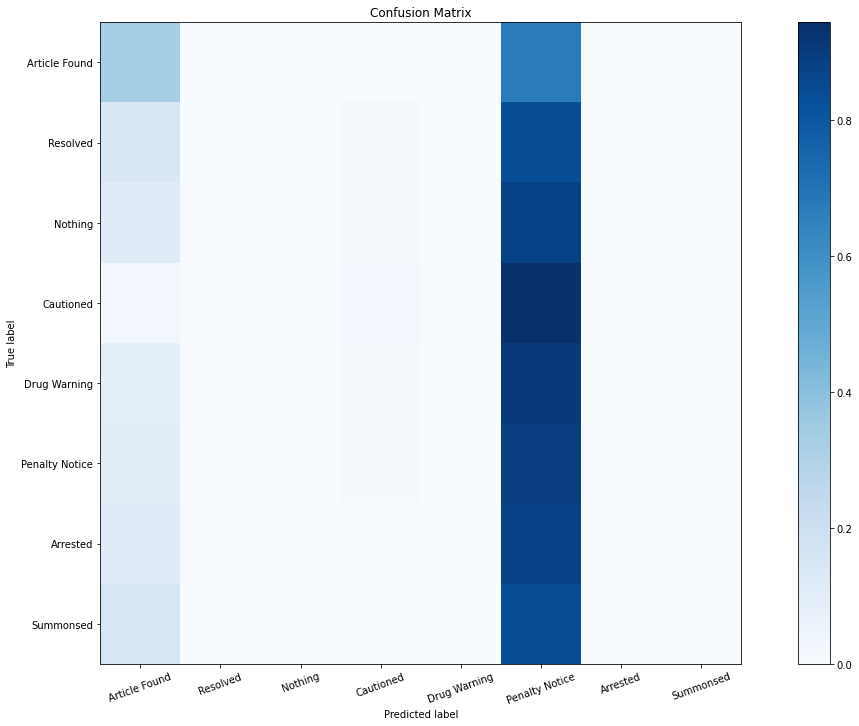

In [264]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

## Adjusting Weights

I will increase the weight of every class except for Nothing.

In [272]:
outcome_weights = {
    0: 2, 
    1: 2, 
    2: 1,
    3: 2,
    4: 2,
    5: 2,
    6: 2,
    7: 2
    }
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1, class_weight=outcome_weights)
ppn.fit(X_train, y_train) 

Perceptron(class_weight={0: 2, 1: 2, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2},
           eta0=1, max_iter=40)

Accurancy Score (Train): 15%
Accuracy Score (Test): 15%

Precision Score (Train): 50%
Precision Score (Test): 49%

Recall Score (Train): 15%
Recall Score (Test): 15%

F1 Score (Train): 8%
F1 Score (Test): 8%

 Confusion Matrix


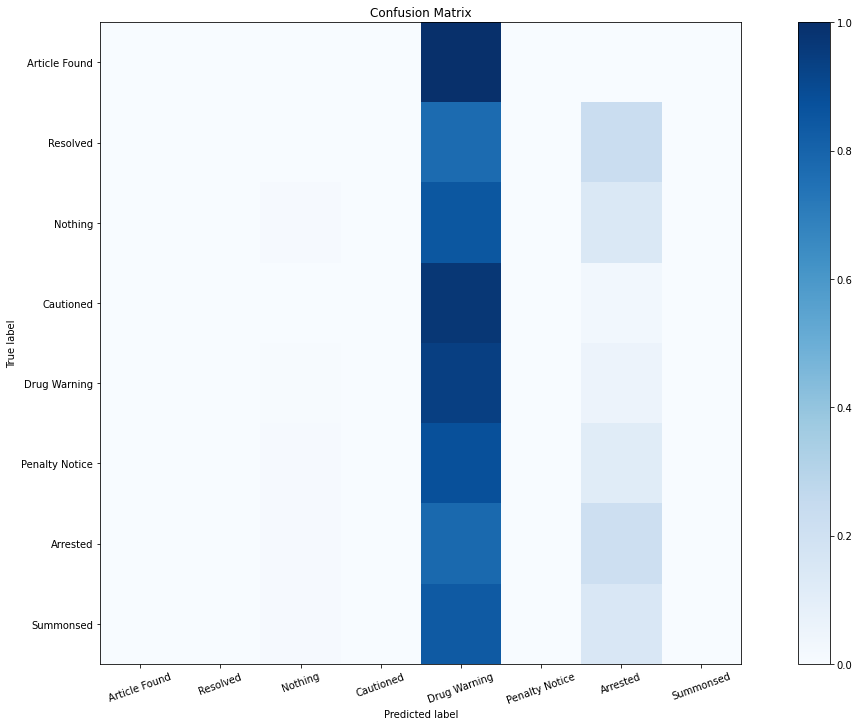

In [271]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

This marginally improves the precision score, but the confusion matrix is more imbalanced now than it was before tuning. I shall now test to see if K-Fold Cross Validation improves results.

## Training Using K-Fold Cross Validation

In [246]:
#Split the data, into a small testing set (test size 0.1), and large training set (that will be passed into K-cross validation)
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(features, target, test_size=0.1, random_state=10)

#Merging X_train and y_train into a single dataframe for K-cross validation utility function
#Merging technique from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [X_train_k, y_train_k]
k_fold_data = pd.concat(frames, axis=1)

#K-cross validation on k_fold_binary_data 
ppn_kfold = Perceptron(max_iter=40,tol=0.001,eta0=1)
util.k_fold_train(model=ppn_kfold, data=k_fold_data)

🚫 WARNING 🚫: this function will take time to process.
 
Fold #1, Training Size: 119268, Validation Size: 29817
Training Score: 0.6539641815071939
Testig Score: 0.6539641815071939


Fold #2, Training Size: 119268, Validation Size: 29817
Training Score: 0.6553392360063052
Testig Score: 0.6553392360063052


Fold #3, Training Size: 119268, Validation Size: 29817
Training Score: 0.653830029848744
Testig Score: 0.653830029848744


Fold #4, Training Size: 119268, Validation Size: 29817
Training Score: 0.6543330985679311
Testig Score: 0.6543330985679311


Fold #5, Training Size: 119268, Validation Size: 29817
Training Score: 0.6547942448938525
Testig Score: 0.6547942448938525




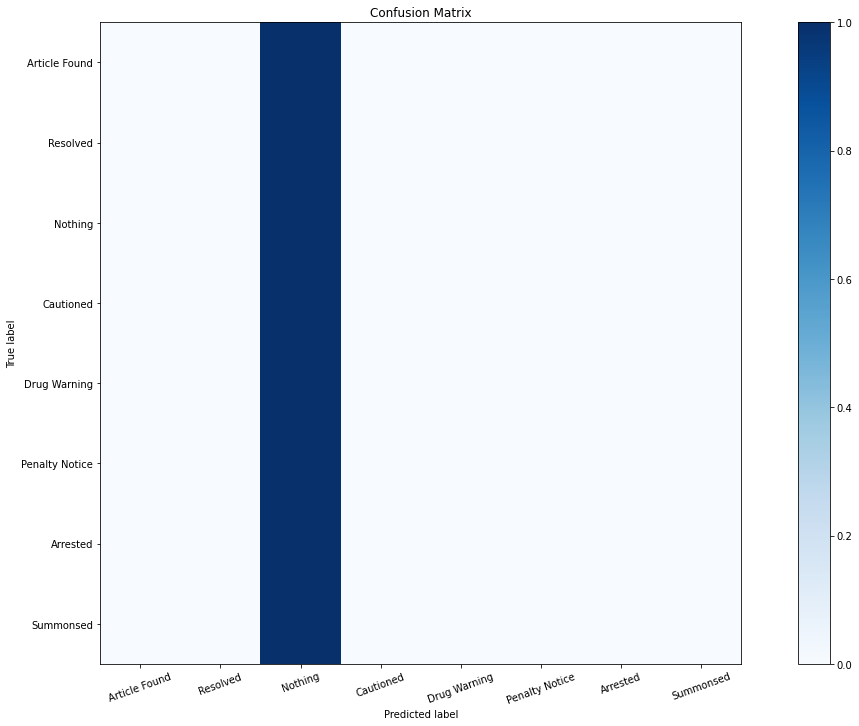

In [247]:
y_predict_k = ppn_kfold.predict(X_test_k)
util.confusion_plot(y_test=y_test_k, y_predictions=y_predict_k)

These results are much better, however upon analysing the confusion matrix there is now significant bias to predicting nothing.

## Split target into "Police Action" (1) and "No Action" (0)
I will try to repeat the above process, but instead of the target being split into eight classes, I split it into two: either there was police action after the stop and search, or there wasn't.

In [248]:
#Replace all values in Outcome column, with 0 if "Nothing found - no further action", else 1.
# Reference for dictionary idea to replace values: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
outcome_splitter = {
    "Nothing found - no further action": 0, 
    "Article found - Detailed outcome unavailable": 1, 
    "Local resolution": 1,
    "Offender cautioned": 1,
    "Offender given drugs possession warning": 1,
    "Offender given penalty notice": 1,
    "Suspect arrested": 1,
    "Suspect summonsed to court": 1
    }
data_binary = data.applymap(lambda s: outcome_splitter.get(s) if s in outcome_splitter else s)
data_binary.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
1,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
2,Person search,2015-03-02 18:45:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
4,Person and Vehicle search,2015-03-03 15:50:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
5,Person search,2015-03-03 20:20:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0


In [249]:
data_binary_encoded, encoders_binary = util.data_encoder(data_binary)

print(encoders_binary)
data_binary_encoded.head()

{'Type Encoder': LabelEncoder(), 'Date Encoder': LabelEncoder(), 'Gender Encoder': LabelEncoder(), 'Age range Encoder': LabelEncoder(), 'Officer-defined ethnicity Encoder': LabelEncoder(), 'Legislation Encoder': LabelEncoder(), 'Object of search Encoder': LabelEncoder(), 'Outcome Encoder': LabelEncoder()}


,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,1
1,1,0,51.512286,-0.114491,1,1,0,4,8,1
2,1,1,51.512286,-0.114491,1,1,4,4,8,1
4,0,2,51.512286,-0.114491,1,1,4,4,8,1
5,1,3,51.512286,-0.114491,1,1,0,3,3,0


In [250]:
# Split into features and target
target_binary = data_binary_encoded["Outcome"]
features_binary = data_binary_encoded.drop('Outcome', axis=1)

#Split the data, into a small testing set (test size 0.1), and large training set (that will be passed into K-cross validation)
X_train_binary_k, X_test_binary_k, y_train_binary_k, y_test_binary_k = train_test_split(features_binary, target_binary, test_size=0.1, random_state=10)

#Merging X_train and y_train into a single dataframe for K-cross validation utility function
#Merging technique from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [X_train_binary_k, y_train_binary_k]
k_fold_binary_data = pd.concat(frames, axis=1)

#K-cross validation on k_fold_binary_data 
pnn_binary_kfold = Perceptron(max_iter=40,tol=0.001,eta0=1)
util.k_fold_train(model=pnn_binary_kfold, data=k_fold_binary_data)

🚫 WARNING 🚫: this function will take time to process.
 
Fold #1, Training Size: 119268, Validation Size: 29817
Training Score: 0.34668142334909613
Testig Score: 0.34668142334909613


Fold #2, Training Size: 119268, Validation Size: 29817
Training Score: 0.6553392360063052
Testig Score: 0.6553392360063052


Fold #3, Training Size: 119268, Validation Size: 29817
Training Score: 0.653830029848744
Testig Score: 0.653830029848744


Fold #4, Training Size: 119268, Validation Size: 29817
Training Score: 0.6543330985679311
Testig Score: 0.6543330985679311


Fold #5, Training Size: 119268, Validation Size: 29817
Training Score: 0.3453566757219036
Testig Score: 0.3453566757219036




It seems this did not yield better results as Fold #1 and Fold #5 have much lower training and testing scores. 

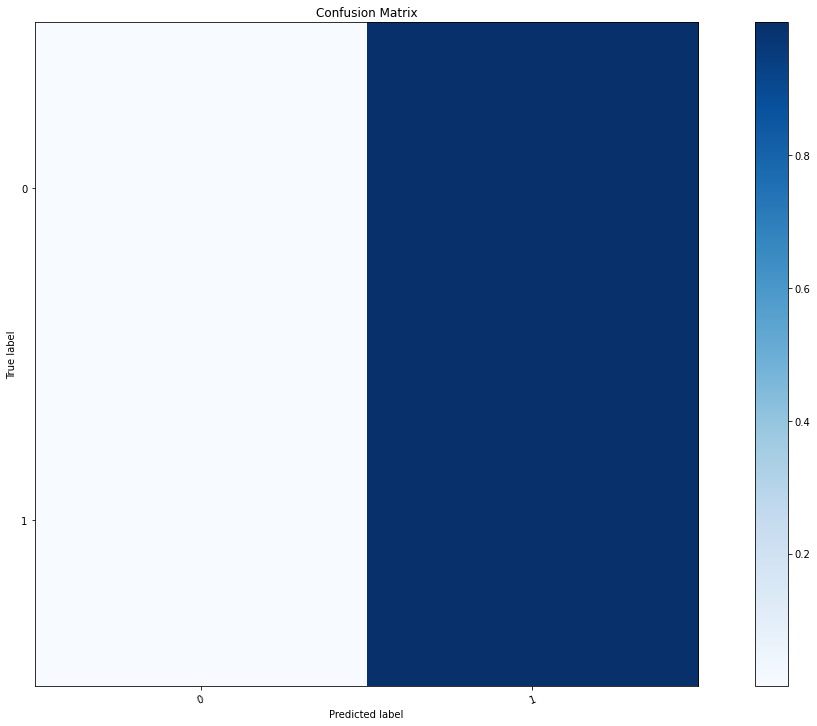

In [251]:
y_predict_binary_k = pnn_binary_kfold.predict(X_test_binary_k)
util.confusion_plot(y_test=y_test_binary_k, y_predictions=y_predict_binary_k, target_classes=[0, 1])

Very biased towards predicting a Police Action outcome, opposite to what K-Fold produced without binary encoding.

## Using SMOTE
We use SMOTE to even out the unbalanced dataset

Class 0: 0.02%     (41)
Class 1: 0.68%     (1121)
Class 2: 65.41%     (108353)
Class 3: 0.1%     (167)
Class 4: 10.74%     (17788)
Class 5: 2.31%     (3824)
Class 6: 19.96%     (33067)
Class 7: 0.78%     (1290)
Total: 165651


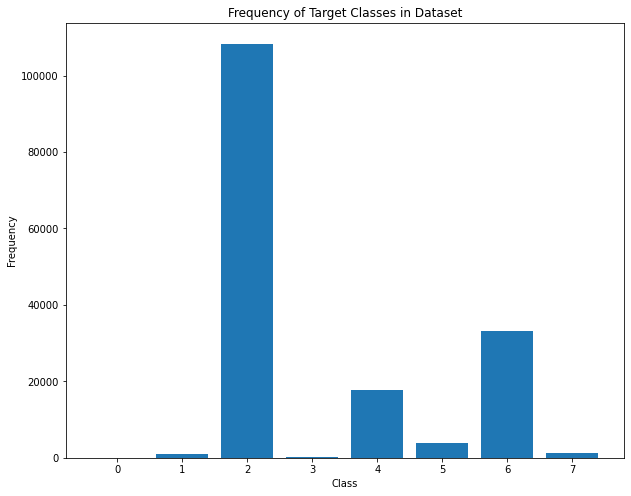

In [252]:
usm.display_frequencies(data_encoded["Outcome"])

Class 0: 12.5%     (86784)
Class 1: 12.5%     (86784)
Class 2: 12.5%     (86784)
Class 3: 12.5%     (86784)
Class 4: 12.5%     (86784)
Class 5: 12.5%     (86784)
Class 6: 12.5%     (86784)
Class 7: 12.5%     (86784)
Total: 694272


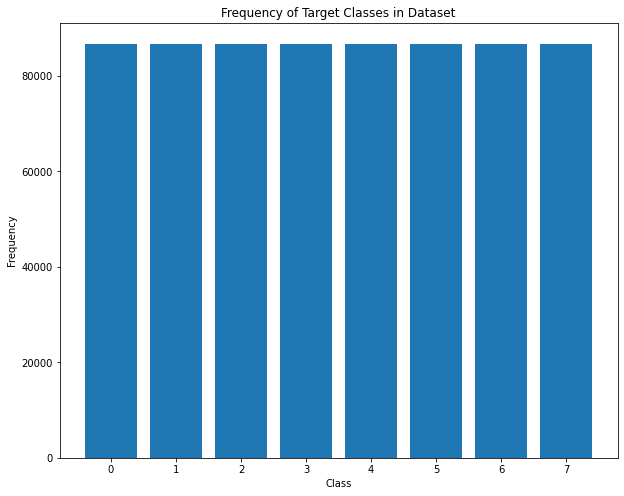

In [253]:
X_smote, y_smote = usm.smote_data(X_train, y_train)
usm.display_frequencies(y_smote)

In [254]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_smote, y_smote)

Perceptron(eta0=1, max_iter=40)

Accurancy Score (Train): 35%
Accuracy Score (Test): 34%

Precision Score (Train): 52%
Precision Score (Test): 50%

Recall Score (Train): 35%
Recall Score (Test): 34%

F1 Score (Train): 39%
F1 Score (Test): 39%

 Confusion Matrix


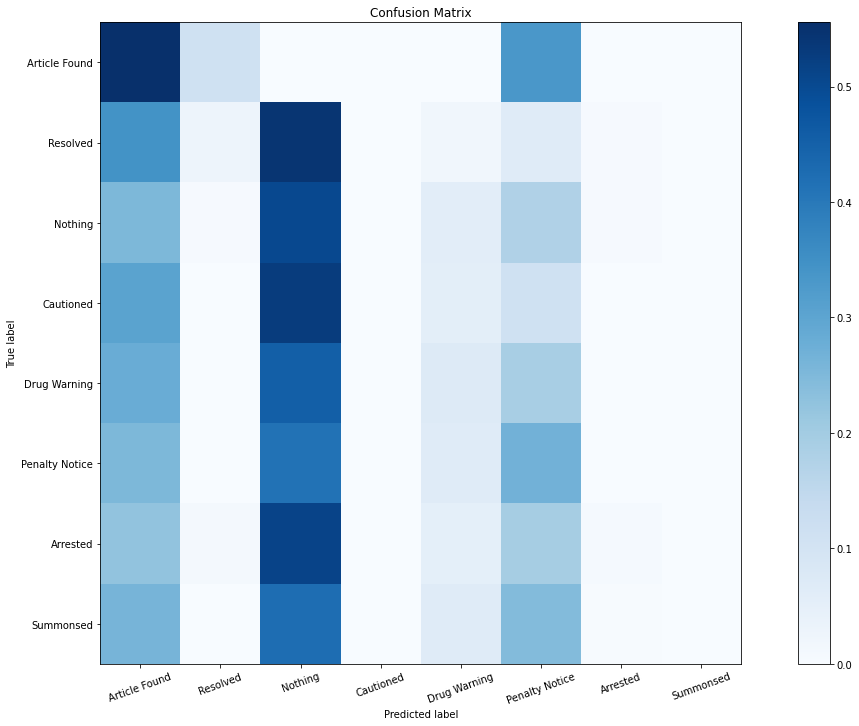

In [255]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

Best precision score so far and a better confusion matrix, will test to see if biased SMOTE is even better

## Using Biased SMOTE
We over sample minority classes, but not to an extent that equalizes them to the majority class

Class 0: 7.76%     (30000)
Class 1: 7.76%     (30000)
Class 2: 22.44%     (86784)
Class 3: 7.76%     (30000)
Class 4: 15.51%     (60000)
Class 5: 12.93%     (50000)
Class 6: 18.1%     (70000)
Class 7: 7.76%     (30000)
Total: 386784


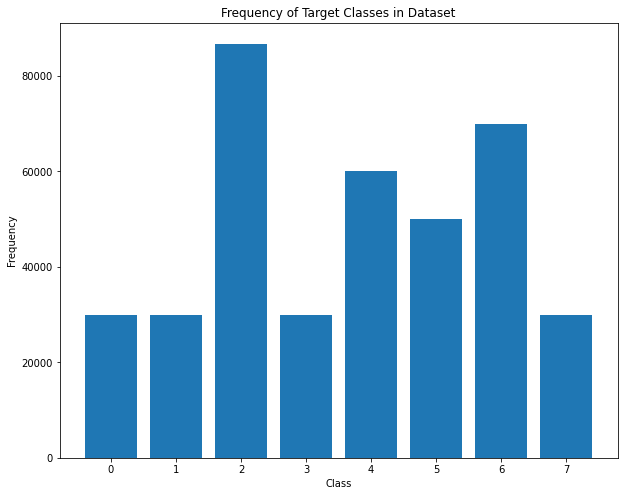

In [256]:
sampling_strategy = {0:30000, 1:30000, 2:86784, 3:30000, 4:60000, 5:50000, 6:70000, 7:30000}
X_smote, y_smote = usm.smote_data(X_train, y_train, sampling_strategy=sampling_strategy)
usm.display_frequencies(y_smote)

In [257]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_smote, y_smote)

Perceptron(eta0=1, max_iter=40)

Accurancy Score (Train): 64%
Accuracy Score (Test): 64%

Precision Score (Train): 43%
Precision Score (Test): 42%

Recall Score (Train): 64%
Recall Score (Test): 64%

F1 Score (Train): 51%
F1 Score (Test): 51%

 Confusion Matrix


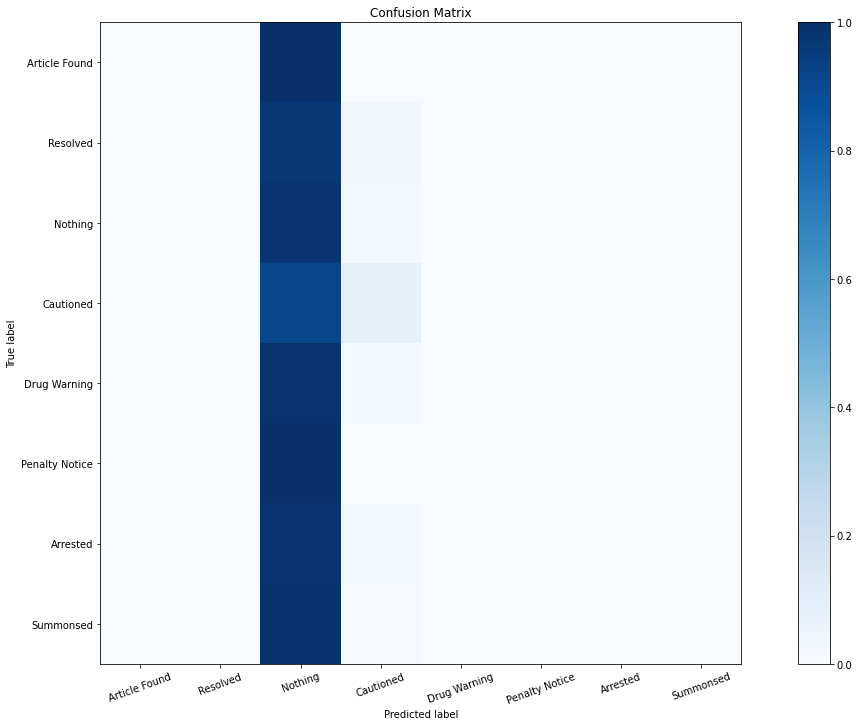

In [258]:
evaluate(model=ppn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

Once again the model is bias towards predicting Nothing.

## Using Grid Search to Tune Hyperparamaters
The most well balanced confusion matrix out of all the perceptron models was the perceptron using the preprocessed features, so I will use Grid Search on these features.

In [281]:
from sklearn.model_selection import GridSearchCV
ppn_param = {'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'eta0': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],'max_iter': [5, 10, 15, 20, 30, 40, 50, 1000]}
ppn_search = GridSearchCV(Perceptron(), ppn_param, verbose=1, cv=3, scoring="precision_weighted", n_jobs=-1)
ppn_search.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 12.3min finished


GridSearchCV(cv=3, estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03,
                                   0.1, 0.3],
                         'eta0': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1,
                                  0.3, 1],
                         'max_iter': [5, 10, 15, 20, 30, 40, 50, 1000]},
             scoring='precision_weighted', verbose=1)

Accurancy Score (Train): 64%
Accuracy Score (Test): 64%

Precision Score (Train): 43%
Precision Score (Test): 43%

Recall Score (Train): 64%
Recall Score (Test): 64%

F1 Score (Train): 52%
F1 Score (Test): 51%

 Confusion Matrix


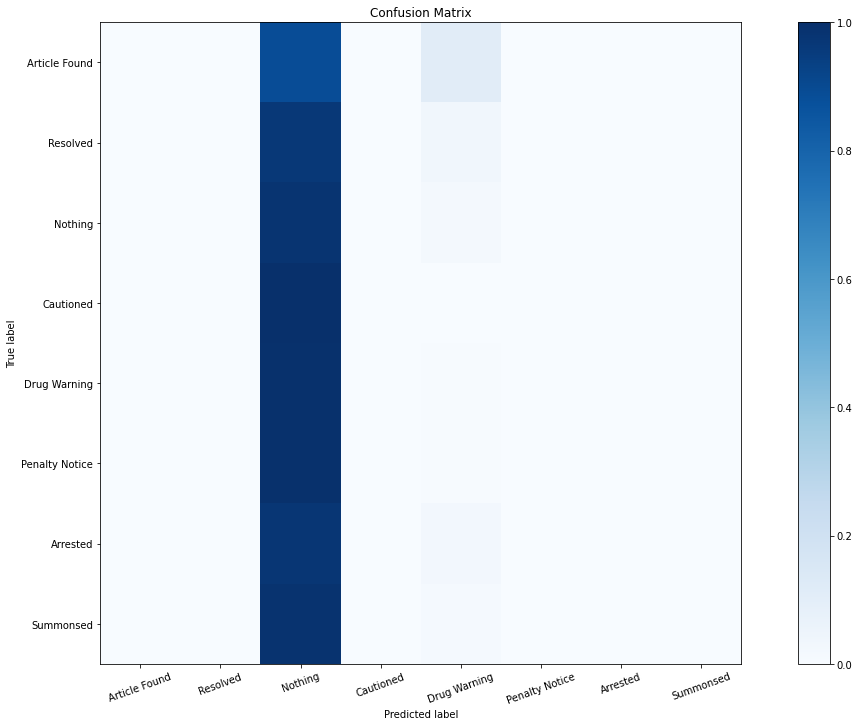

In [282]:
evaluate(model=ppn_search.best_estimator_, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, average="weighted")

In [283]:
print(ppn_search.best_params_)

{'alpha': 0.0001, 'eta0': 0.0001, 'max_iter': 5}


Very imbalanced confusion matrix, the Grid Search function appears to be looking for the best accuracy rather than balance as this produced the best accuracy score.